## Clustering and PCA on NGO Data

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree 


In [2]:
# To display all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\Nitin\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


### Reading and understanding the data

In [3]:
# Reading the country dataset

country_data = pd.read_csv('./Dataset/Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Reading the data dictionary file

data_dict = pd.read_csv('./Dataset/data-dictionary.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### Normal check (Shape, Info, Head, Tail, Summary) of given data

In [5]:
#checking Shape of the country dataset
country_data.shape

(167, 10)

In [6]:
#checking tail of the country dataset
country_data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [7]:
#Summary of given country dataset 
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Inforamation of country dataset 
country_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Checking Count of Missing Values

In [9]:
# Number of missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Conclusion: 
We can see no missing value present in the data set. Out of 167, all are non-null. So we don't need to do any missing value imputation.



In [10]:
#drop duplicate records if any
country_data.drop_duplicates(inplace=True)
country_data.shape

(167, 10)

#### Conclusion: 
No duplicate values present in the dataset



### Visualisations 

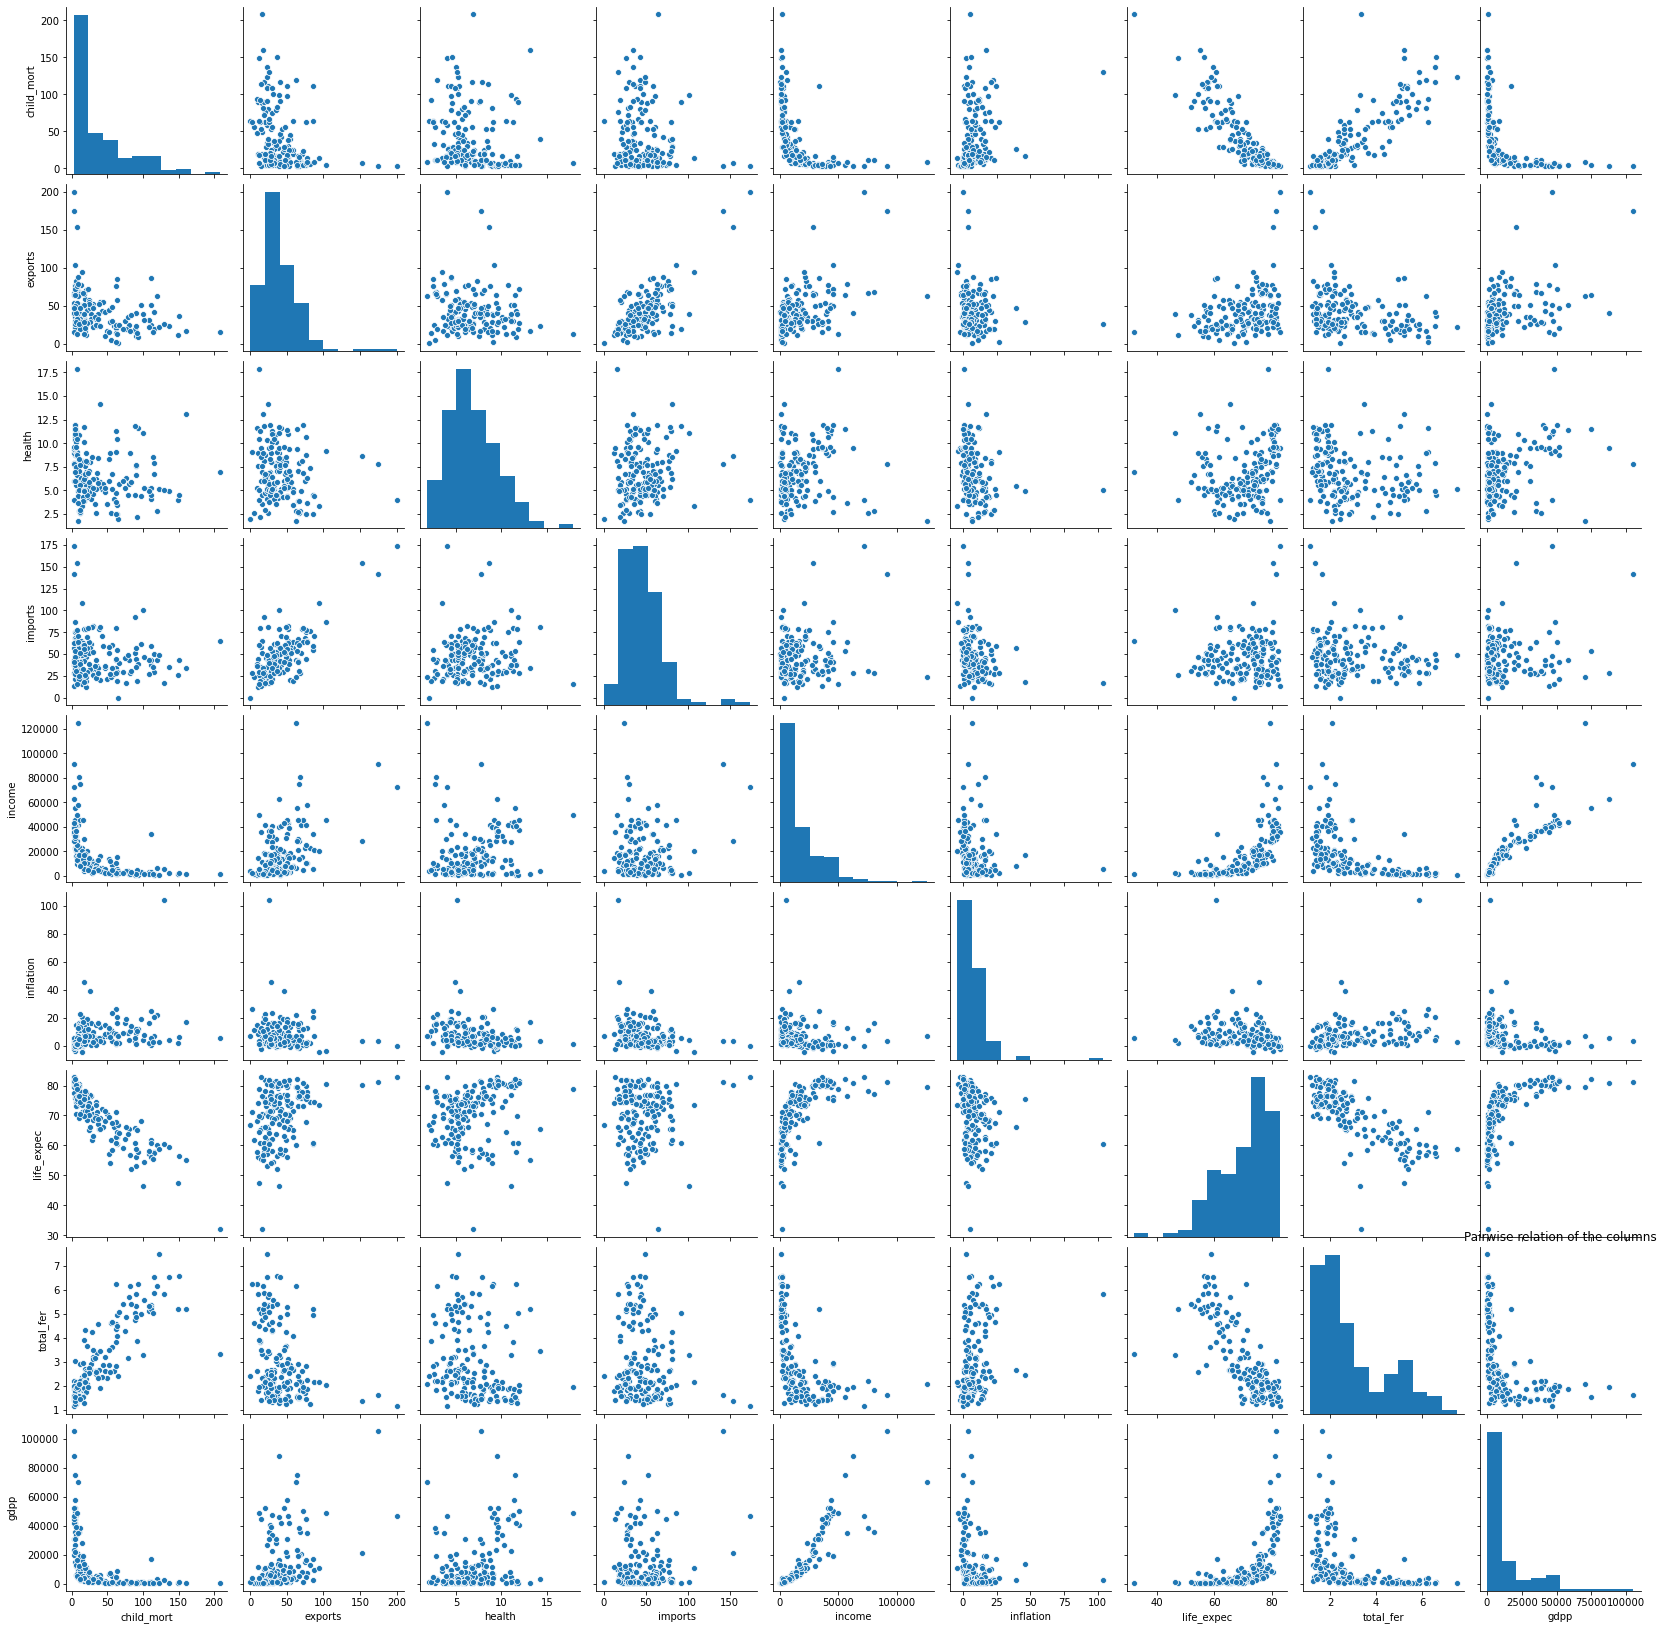

In [11]:
# Check the relation between different variables of the data set by plotting a pair plot.
# Visualising all the numerical variables using the pair plot:
sns.pairplot(country_data)
plt.title("Pairwise relation of the columns")
plt.show()

#### Inference: 
Interestingly the pair plots above does not show any significant cluster formation

- GDP per capita is seems correlated with the income variable.
- The countries Where GDP is high, Life expectancy is more there.
- Life expectancy is inversely proportional to the child mortality rate and total fer
- We can observe import and export varies with income and GDP.



### Visualizing Top 10 countries for each variable

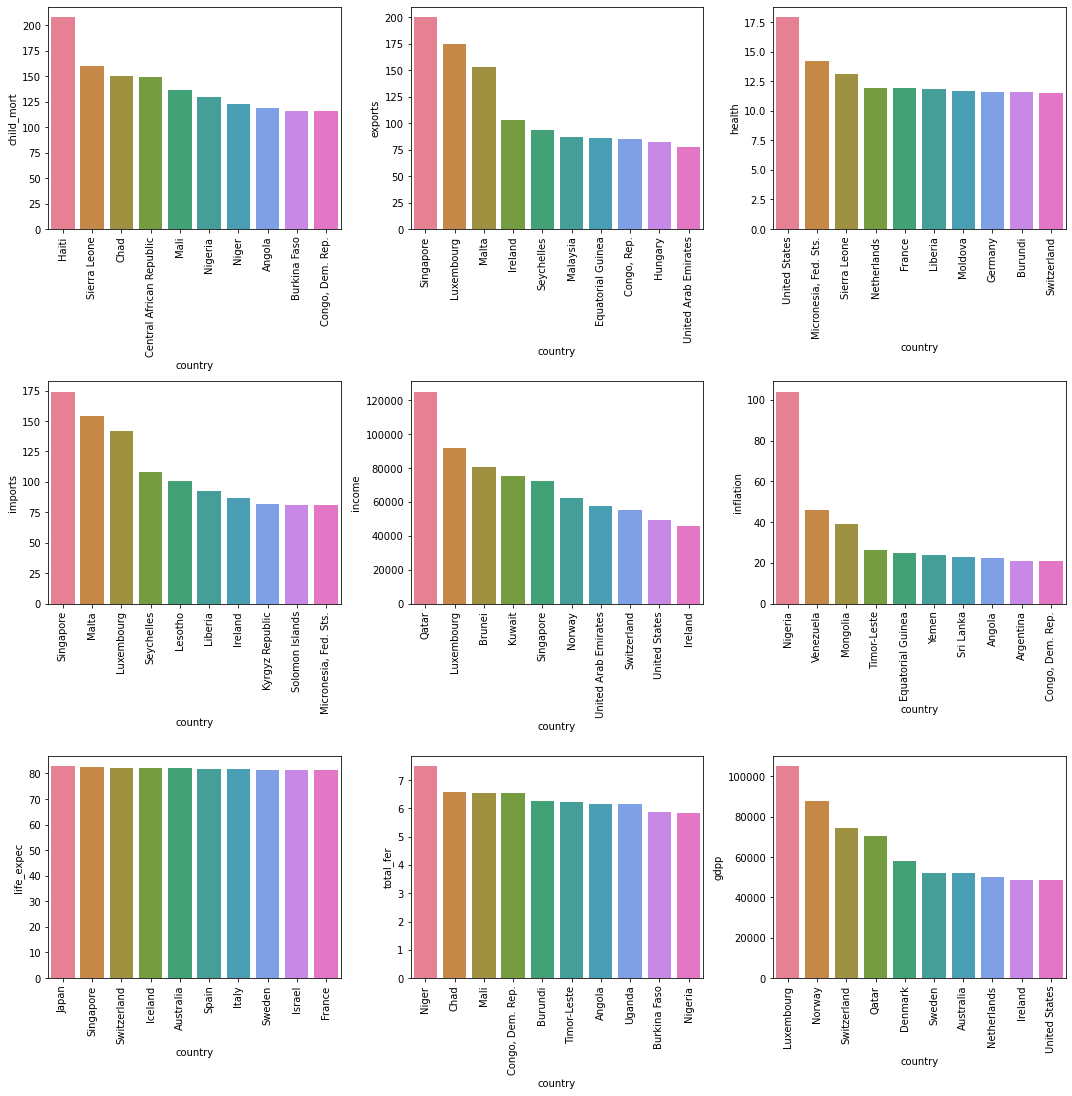

In [12]:
#First let's get the dataframe with numerical columns
cols = country_data.select_dtypes(include=['int64','float64','int32','float32',]).columns

# Visualising through bar plot.
plt.figure(figsize=(15,45))
i=0
for val in cols:
    i = i+1
    plt.subplot(9,3,i)
    #bot5 = country_data[['country',val]].sort_values(val, ascending = True).head(5)
    top10 = country_data[['country',val]].sort_values(val, ascending = False).head(10)
    sns.barplot(x='country', y=val, data= top10, palette='husl')
    plt.xticks(rotation=90)
    #sns.barplot(x='country', y=val, data= bot5)
plt.tight_layout()

### Visualizing Bottom 10 countries for each variable

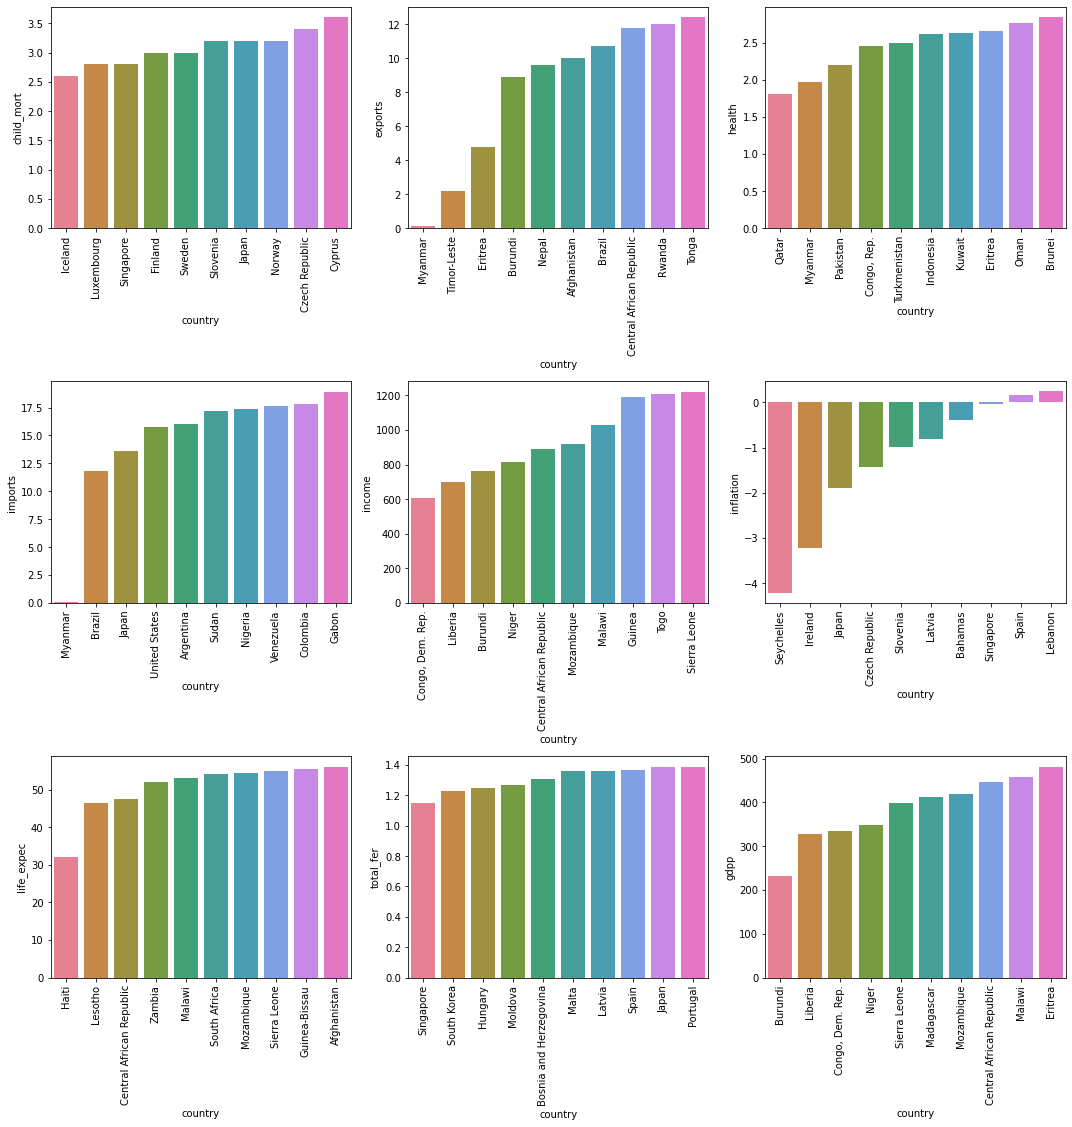

In [13]:
#First let's get the dataframe with numerical columns
cols = country_data.select_dtypes(include=['int64','float64','int32','float32',]).columns

# Visualising through bar plot.
plt.figure(figsize=(15,45))
i=0
for val in cols:
    i = i+1
    plt.subplot(9,3,i)
    bot10 = country_data[['country',val]].sort_values(val, ascending = True).head(10)
    
    sns.barplot(x='country', y=val, data= bot10, palette='husl')
    plt.xticks(rotation=90)
    
plt.tight_layout()

#### Conclusion: The countries that HELP should focus are:
- Child Mortality is highest in Haiti
- Inflation is highest in Nigeria
- Total Fer is highest in Nigeria
- Life expectency is lowest in Haiti
- GDPP is lowest in Burundi
- Income is lowest in Congo, Dem. Rep.
- Lowest imports and exports are recorded for Myanmar
- Quatar should take care of their Health sector



### Visualisation of correlation through Heat-map
Lets see the correlation plot among the numeric variables showing how strongly they are related

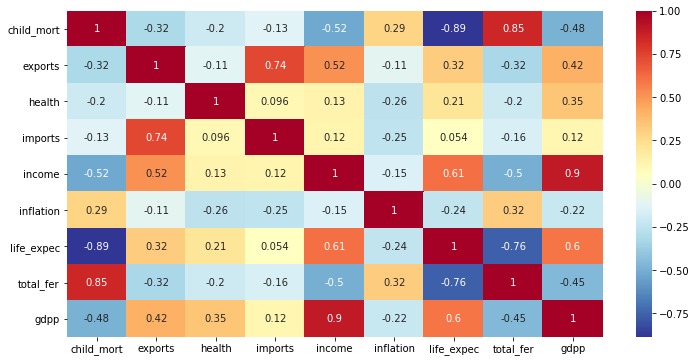

In [14]:
#Visualisation of correlation through Heat-map 
plt.figure(figsize=(12,6))
sns.heatmap(country_data.corr(), cmap=plt.cm.RdYlBu_r , annot=True)
plt.show()

#### Conclusions:
We can notice there is a positive correlation between:

- child_mort and total_fer
- income and gdpp
- exports and imports
- income and life_expec

and Negative correlation between:

- child_mort and life_expec
- life_expec and total_fer

This explains there is multicollinearity amongst other variables. A lot of highly correlated variables exist, hence the usage of PCA is justified. 



### Derived Metrics - 
#### Converting the values of columns 'exports', 'imports', and 'health' to absolute values.
The 'exports', 'health', and 'imports' are given as %age of the total GDP but the total GDP is not given. Deducing imports, exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.


Steps:
- assumed 'GDP' is the total GDP of a country, population is 'P' and 'GDPP' is the GDP per capita.
- So, GDPP = GDP/P
- According to the 'Data Dictonary', the 'exports', 'imports', and 'health' columns are in the %age (let's assume X% for country 'C') of the total GDP.
- So, the absolute value of exports for C = GDP*X/100
- Thus "exports per person" = (GDP X)/(100 P) = GDPP*X/100.

Conclusion: Although we do not have the total GDP available, we can apply (GDPP*X/100) safely to correct the 'exports', 'health', and 'imports' columns

In [15]:
#Let's convert %age to absolute values for 'exports', 'health', and 'imports' columns
country_new = country_data.copy()

country_new['exports'] = country_new['exports']*country_new['gdpp']/100

country_new['imports'] = country_new['imports']*country_new['gdpp']/100

country_new['health'] = country_new['health']*country_new['gdpp']/100

country_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Outlier Analysis

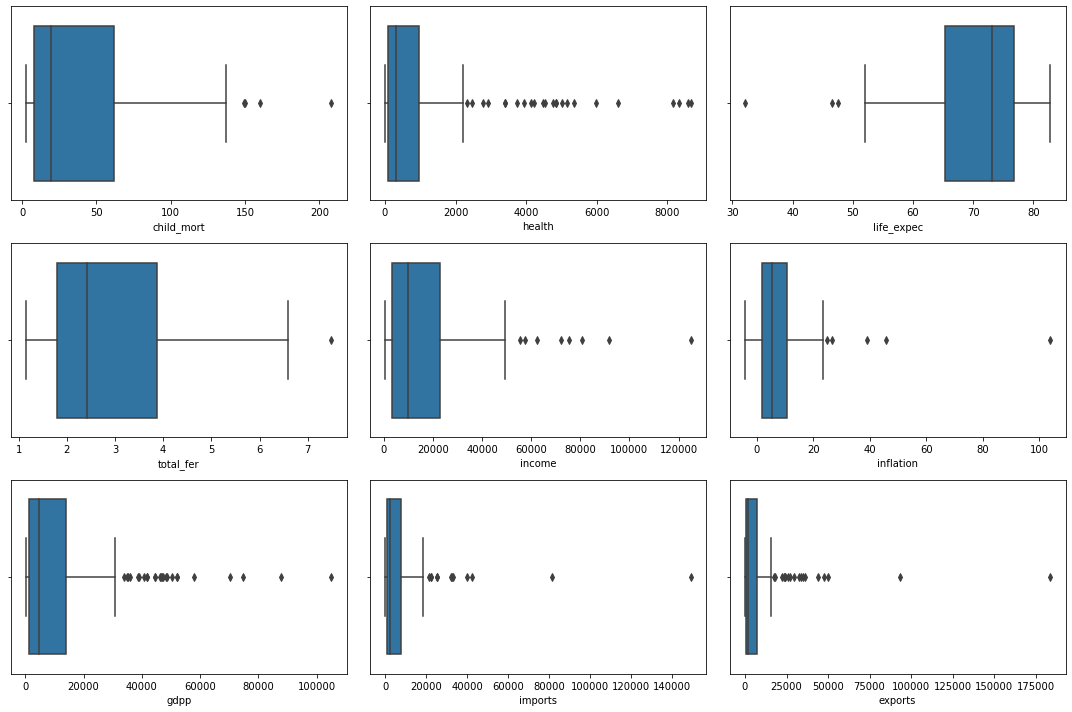

In [16]:
# We will see how values in each columns are distributed using boxplot

fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(country_new['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_new['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_new['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_new['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_new['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_new['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_new['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_new['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_new['exports'], ax = axs[2,2])


plt.tight_layout()

The above plots show that there are outliers present in some columns.

In [17]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
country_new.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [18]:
# Countries having Very high gdpp.
country_new[country_new['gdpp']>= np.percentile(country_new.gdpp,95)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


In [19]:
# count of corntries with high GDPP
(country_new['gdpp']> np.percentile(country_new.gdpp,95)).sum()

9

In [20]:
country_new[country_new['health']> np.percentile(country_new.health,95)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400


In [21]:
#Countries above 95% percentile in the 'gdpp' column
print(list(country_new[country_new['gdpp'] > np.percentile(country_new.gdpp,95)]['country']))

['Australia', 'Denmark', 'Ireland', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar', 'Sweden', 'Switzerland']


In [22]:
#Countries above 95% percentile in the 'income' column
print(list(country_new[country_new['income'] > np.percentile(country_new.income,95)]['country']))

['Brunei', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar', 'Singapore', 'Switzerland', 'United Arab Emirates', 'United States']


In [23]:
#Countries above 95% percentile in the 'inflation' column
print(list(country_new[country_new['inflation'] > np.percentile(country_new.inflation,95)]['country']))

['Angola', 'Argentina', 'Equatorial Guinea', 'Mongolia', 'Nigeria', 'Sri Lanka', 'Timor-Leste', 'Venezuela', 'Yemen']


In [24]:
#Countries above 95% percentile in the 'health' column
print(list(country_new[country_new['health'] > np.percentile(country_new.health,95)]['country']))

['Austria', 'Canada', 'Denmark', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'United States']


#### Conclusion:
- We did the outlier analysis and found that there are outliers in some columns. For eg: few under developed countries will have low life_expectency, low gdpp, low income, low imports & exports, high inflation,high child_mortality, high total_fer and developed countries will have values vice versa for same factors. 

- All the above cases outliers are natural not the artificial ones. So considering that each data provides useful insights. So it is not required to remove outliers in this case. Because by removing the ouliers we lose significant amount of data related to different countries;so we drop the idea to treat outliers here.

- We'll Treat outliers after PCA



### Principal Component Analysis

In [25]:
# Dropping Country field as final dataframe will only contain data columns

country_new1 = country_new.drop(['country'],axis=1)
country_new1.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [26]:
#we observe that a lot of the data variables are of different orders of magnitude. 
#Let's do rescaling so that PCA can be applied.
from sklearn.preprocessing import StandardScaler

# Standarisation technique for scaling
standard_scaler = StandardScaler()
country_new_scaled = standard_scaler.fit_transform(country_new1)

In [27]:
country_new_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### PCA Application
We are doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned. Fundamentally, PCA is a dimensionality reduction technique, i.e., it approximates the original data set to a smaller one containing fewer dimensions.

In [28]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [29]:
#let's apply PCA
pca.fit(country_new_scaled)

PCA(random_state=42, svd_solver='randomized')

In [30]:
#PCA components created
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [31]:
# Variance Ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

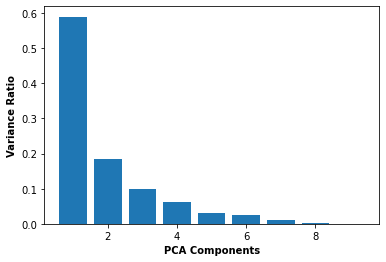

In [32]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')
plt.show()

#### Inference:
- With first component variance explained is almost 60%.
- For second component variance explained is almost 20%.
- over 93% of the data is properly explained by the first 3 principal components.



#### Scree plot
Let's see the screeplot to assess the confirmed number of needed principal components.

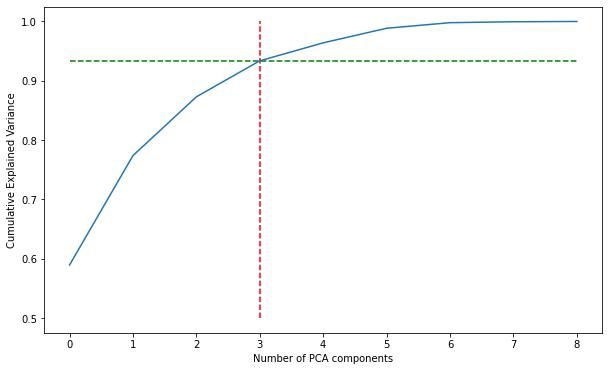

In [33]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0.5, colors="r", linestyles="--")
plt.hlines(y=0.933, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Inference:
We can notice from the above Scree plot that more than 93% variance is explained by the first 3 principal components. Hence, we will use these components only for Clustering process.

In [34]:
# Let's try and check the first three components now
# Checking which attributes are well explained by the pca components
colnames = list(country_new.drop('country',axis=1).columns)
pca_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pca_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


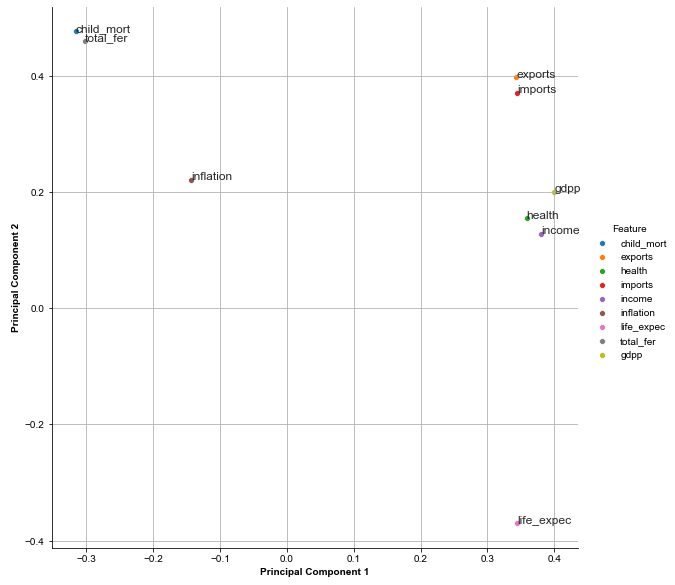

In [35]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=pca_df, x_vars=["PC1"], y_vars=["PC2"], hue = "Feature" ,height=8)
sns.set(style="darkgrid")
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))

plt.grid()
plt.show()

#### Inference:
- A lot of variables have a good loading score on the first principal component. life expectency, income, gdpp and health are very well explained by PC1.
- Similarly Child mortality and total fertility is well explained by the 2nd prinicpal component.
- Imports and exports are well explained by both the components PC1 and PC2. Inflation is neither explained by PC1 nor with PC2

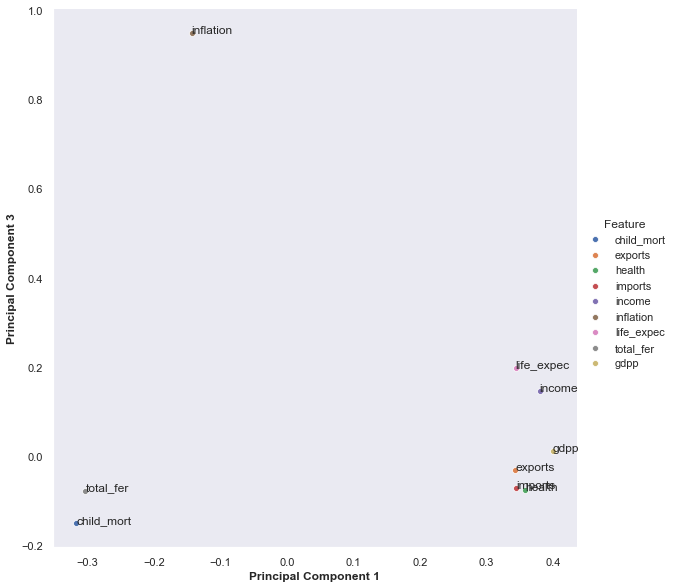

In [36]:
# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=pca_df, x_vars=["PC1"], y_vars=["PC3"], hue = "Feature" ,height=8)
sns.set(style="darkgrid")
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC3[i]))

plt.grid()
plt.show()

Here we can notice inflation is well explained by third Principal component PC3.

#### Since here we can observe more than 90% variance is explained by 3 principal components, so we will build the dataframe using those 3 components only. We'll Run the PCA with the components chosen above.

In [37]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA

final_pca = IncrementalPCA(n_components=3)

In [38]:
#let's project our original data on the 3 principal components
# Fitting the country_new_scaled df on incremental pca df
pca_inc_df = final_pca.fit_transform(country_new_scaled)
pca_inc_df.shape

(167, 3)

In [39]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(pca_inc_df)

#Let's create the newer matrix according to the given principal components
rownames = list(country_new['country'])
pca_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pca_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


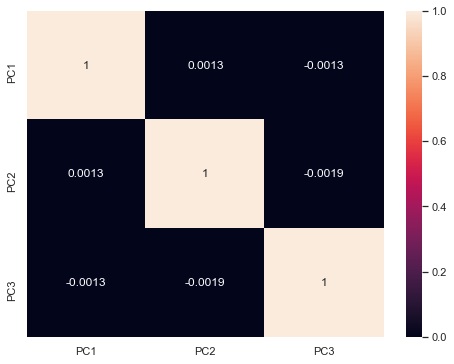

In [40]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(pca_df2.corr(),annot = True)
bottom, top = ax.get_ylim()


As we can notice from above heatmap that the correlation among the variable is almost zero, we can go forward with this dataframe.

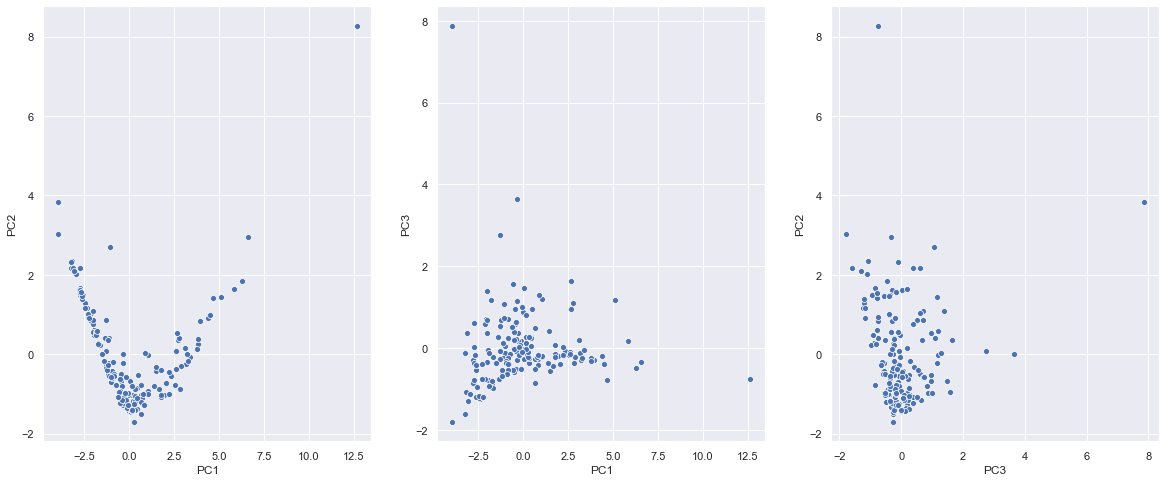

In [41]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=pca_df2, x='PC1', y='PC2')
plt.subplot(1,3,2)
sns.scatterplot(data=pca_df2, x='PC1', y='PC3')
plt.subplot(1,3,3)
sns.scatterplot(data=pca_df2, x='PC3', y='PC2')


#### Outlier Treatment
There are 2 types of outliers and we will treat outliers of New dataset as it can skew our dataset


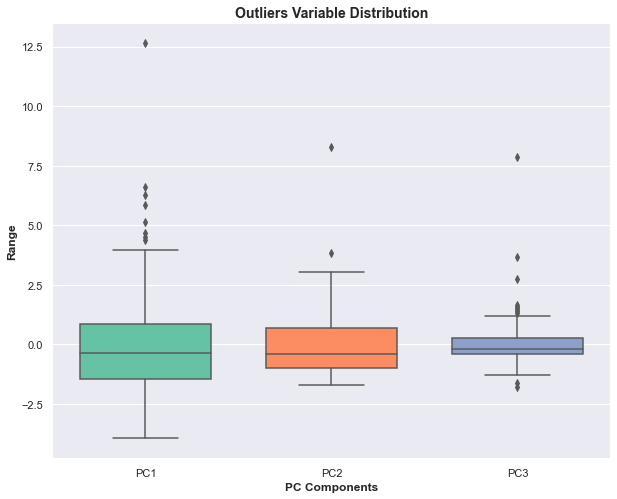

In [42]:
# Outlier Analysis 

outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = pca_df2[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [43]:
# Statistical Outlier treatment for PC_1

Q1 = pca_df2.PC1.quantile(0.01)
Q3 = pca_df2.PC1.quantile(0.99)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]

# Statistical Outlier treatment for PC_2

Q1 = pca_df2.PC2.quantile(0.01)
Q3 = pca_df2.PC2.quantile(0.99)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]

# Statistical Outlier treatment for PC_3

Q1 = pca_df2.PC3.quantile(0.01)
Q3 = pca_df2.PC3.quantile(0.99)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1) & (pca_df2.PC3 <= Q3)]

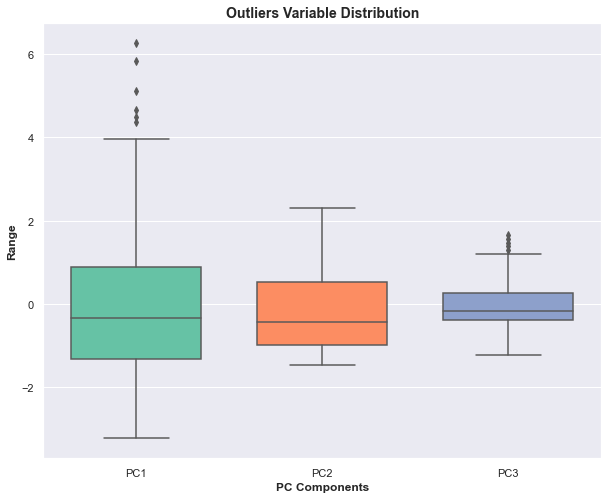

In [44]:
# Plot after Outlier removal 

outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = pca_df2[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [45]:
pca_df2.shape

(155, 4)

### Hopkins Statistics Check
The Hopkins statistic is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0



In [46]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
#Let's check the Hopkins measure
hopkins(pca_df2.drop(['country'],axis=1))

0.7983878209048108

- 0.79 is a good Hopkins score. Hence the data is suitable for clustering. Preliminary check is now done.

### Model Building
### K- means Clustering

In [48]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
data_1 = pca_df2.drop('country', axis = 1)

In [49]:
data_1.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


### Silhouette score analysis


$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.


- The value of the silhouette score range lies between -1 to 1.

- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

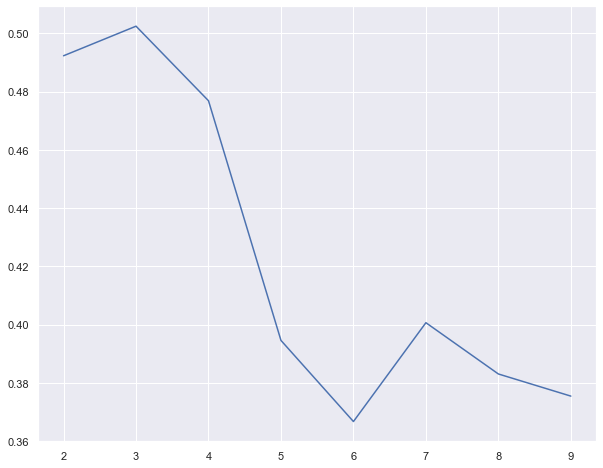

In [50]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data_1)
    ss.append([k, silhouette_score(data_1, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

In [51]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(data_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4923322732358769
For n_clusters=3, the silhouette score is 0.5024889340242994
For n_clusters=4, the silhouette score is 0.4704826966839828
For n_clusters=5, the silhouette score is 0.40559615349281763
For n_clusters=6, the silhouette score is 0.3654855759370004
For n_clusters=7, the silhouette score is 0.37191740913498517
For n_clusters=8, the silhouette score is 0.3858188487748916
For n_clusters=9, the silhouette score is 0.38727147492641706


#### Conlusion:

- From the above analysis we find that 2,3 and 4 seems to be a good number of clusters for K means algorithm.



### Elbow Curve Method

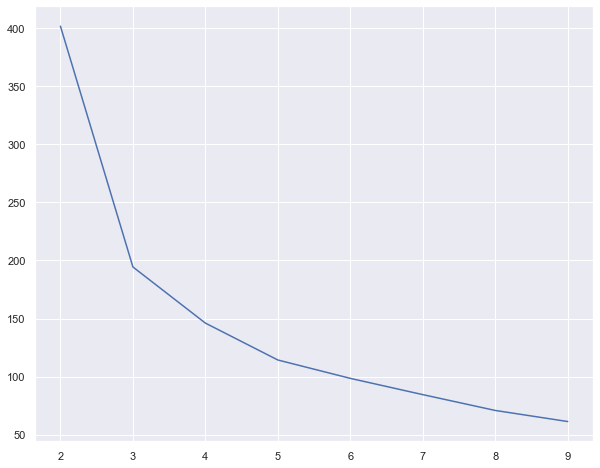

In [52]:
#Now let's proceed to the elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data_1)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

#### Conclusions:

- Looking at the "Elebow curve" we can saythat at cluster k=3 there is a big drop in the squared distance. Also, at k=4 we can see the drop is not as big as previous one. So the observation we obtained from the "Elbow curve" and the "Silhoutte scores" we can say 3 or 4 clusters will be fine for this case. So we choose k = 3 from here.

- Elbow curve estimates k=3 seems good number for clustering.
Now, let's build our model using K-means.



### K- means

In [53]:
#No. of clusters were found above. Let's finally create the clusters and see for ourselves which ones is better
#Let's perform K means using K=3
model_kmean = KMeans(n_clusters=3, max_iter=250, random_state=42)   
#Model training
model_kmean.fit(data_1)                       

KMeans(max_iter=250, n_clusters=3, random_state=42)

In [54]:
model_kmean.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2,
       1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2,
       2])

In [55]:
pca_df2.columns

Index(['country', 'PC1', 'PC2', 'PC3'], dtype='object')

In [56]:
# assign the label

dat4=pca_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_kmean.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat_km.head()


,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Albania,-0.022277,-1.431896,-0.020701,1
2,Algeria,-0.457626,-0.673301,0.961867,1
3,Angola,-2.724520,2.174583,0.606687,2
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1


In [57]:
dat_km['ClusterID'].value_counts()

1    84
2    42
0    29
Name: ClusterID, dtype: int64

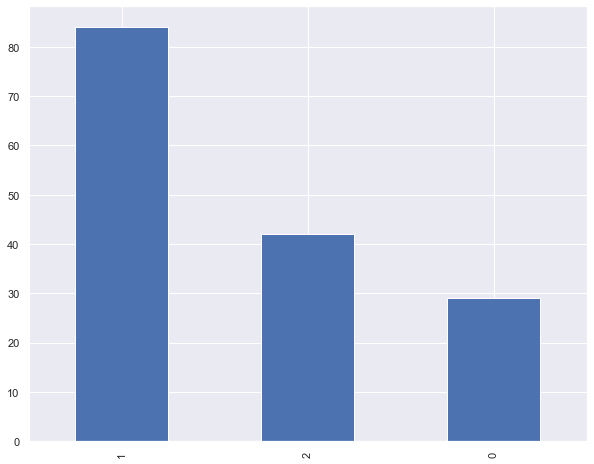

In [58]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')
plt.show()

We have cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

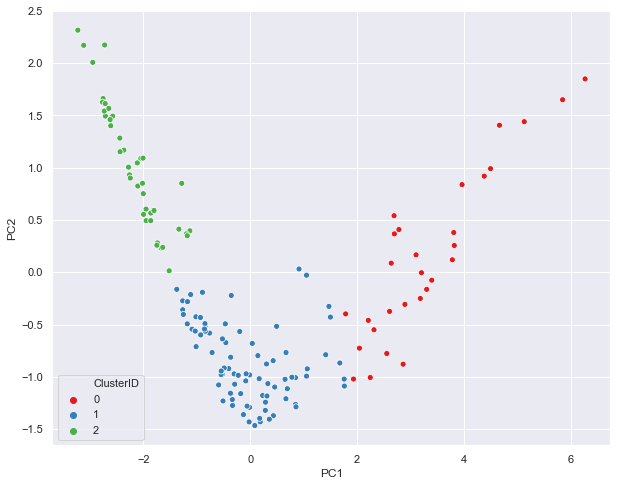

In [59]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = dat_km, palette='Set1')
plt.show()

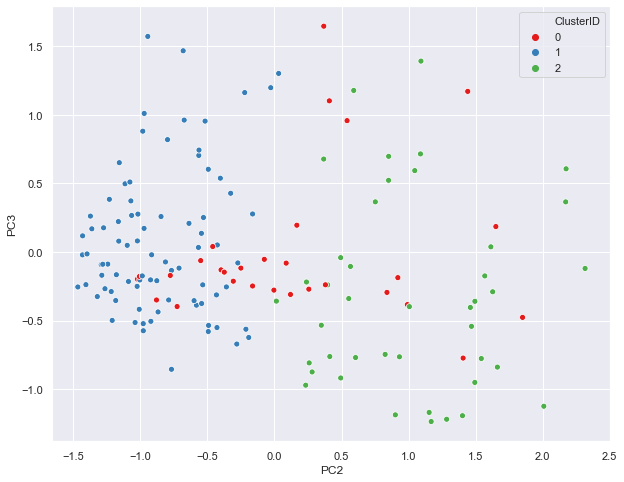

In [60]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km, palette='Set1')
plt.show()

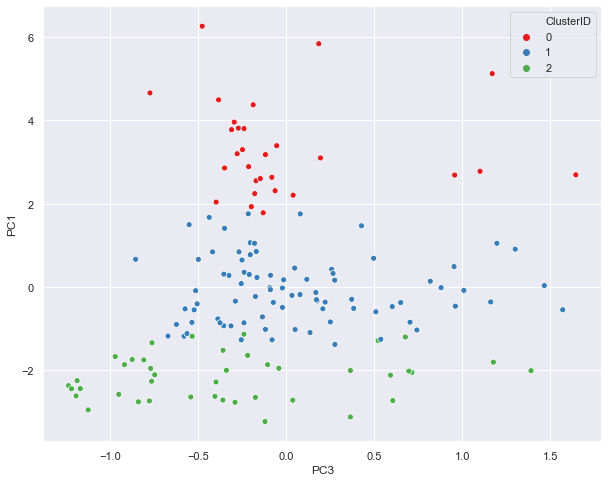

In [61]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km, palette='Set1')
plt.show()

In [62]:
#Now let's create the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
dat5=pd.merge(country_new,dat_km,on='country')
dat6=dat5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exp = pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_imp = pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_hea = pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_inc = pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inf = pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())         
clu_lif = pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_tot = pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation",
              "Life_Expectancy","Total_Fertility","GDPpcapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,5.082759,21511.096552,18129.900000,4084.970000,45800.000000,2.837690,80.403448,1.813793,44017.241379
1,1,21.195238,3412.504744,3488.441918,482.778957,13498.333333,6.609833,73.159524,2.253333,7329.190476
2,2,83.959524,627.916500,669.345095,107.265424,3406.928571,10.153214,60.171429,4.903571,1663.309524


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. 

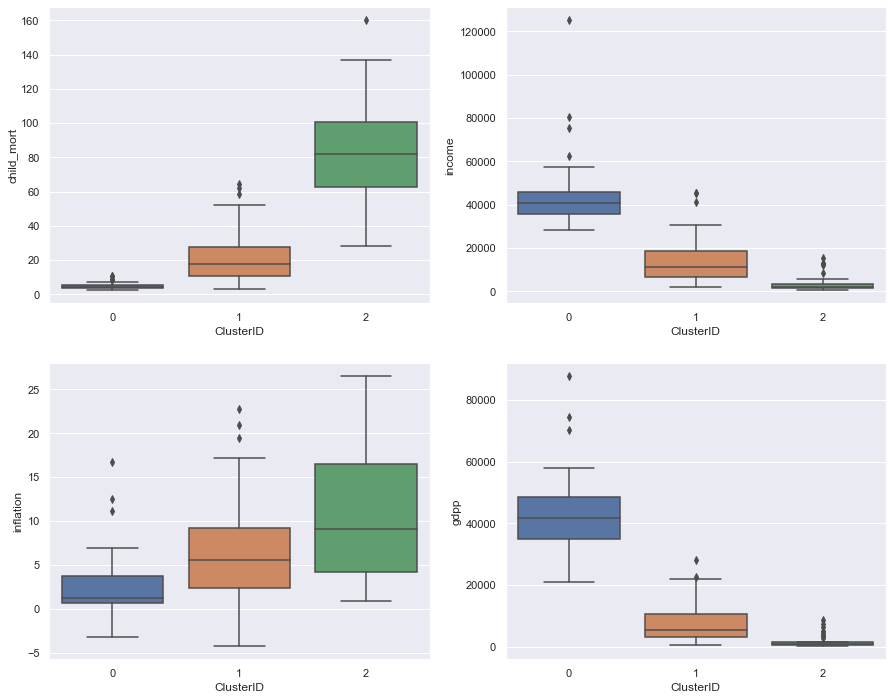

In [63]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'ClusterID', y = 'child_mort', data = dat6, ax=axes[0][0])
sns.boxplot(x = 'ClusterID', y = 'income', data = dat6, ax=axes[0][1])
sns.boxplot(x = 'ClusterID', y = 'inflation', data= dat6, ax=axes[1][0])
sns.boxplot(x = 'ClusterID', y = 'gdpp', data= dat6, ax=axes[1][1])

#### Inference:
- Child Mortality is highest for Cluster 2. These clusters need some aid.
- Inflation is really High for Cluster 2 and very low for cluster 0.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.
- Income per capita and gdpp seems lowest for countries in clusters 1 and 2. Hence, these countries need some help.



In [64]:
#let's take a look at those countries clusters and try to make sense if the clustering process worked well.
# List of countries in Cluster 0
dat6[dat6['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,0
15,Belgium,4.5,33921.6,33166.8,4750.80,41100,1.880,80.0,1.86,44400,0
22,Brunei,10.5,23792.2,9884.0,1002.52,80600,16.700,77.1,1.84,35300,0
28,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,0
39,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,0
41,Denmark,4.1,29290.0,25288.0,6612.00,44000,3.220,79.5,1.87,58000,0
49,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,0
50,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,0
54,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,0


In [65]:
# List of countries in Cluster 1
dat6[dat6['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20,1987.74,267.895,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,1400.44,185.982,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,7185.80,735.660,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,1648.00,834.300,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,1458.66,141.680,6700,7.77,73.3,1.69,3220,1
...,...,...,...,...,...,...,...,...,...,...,...
145,Ukraine,11.7,1398.87,1517.67,229.284,7820,13.40,70.4,1.44,2970,1
149,Uruguay,10.6,3129.70,3022.60,993.650,17100,4.91,76.4,2.08,11900,1
150,Uzbekistan,36.3,437.46,393.30,80.178,4240,16.50,68.8,2.34,1380,1
151,Vanuatu,29.2,1384.02,1565.19,155.925,2950,2.62,63.0,3.50,2970,1


In [66]:
# List of countries in Cluster 2
dat6[dat6['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,2
20,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,2
24,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,2
25,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,2
27,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,2
33,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,2
34,"Congo, Dem. Rep.",116.0,137.2740,165.664,26.4194,609,20.800,57.5,6.54,334,2
35,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.700,60.4,4.95,2740,2


Now lets apply Hierarchial Clustering to see if we get any better clusters or not.

### Hierarchical Clustering
- One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.
- The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

#### Single linkage

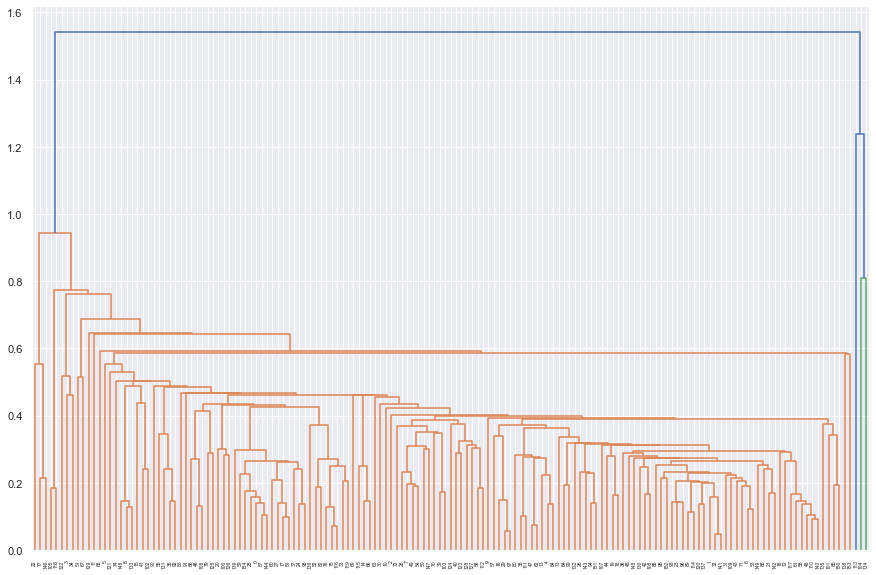

In [67]:
# First we'll try the single linkage procedure.

plt.figure(figsize=(15,10))
mergings = linkage(data_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Inference:
We can observe that we are not getting good results in single linkage method.



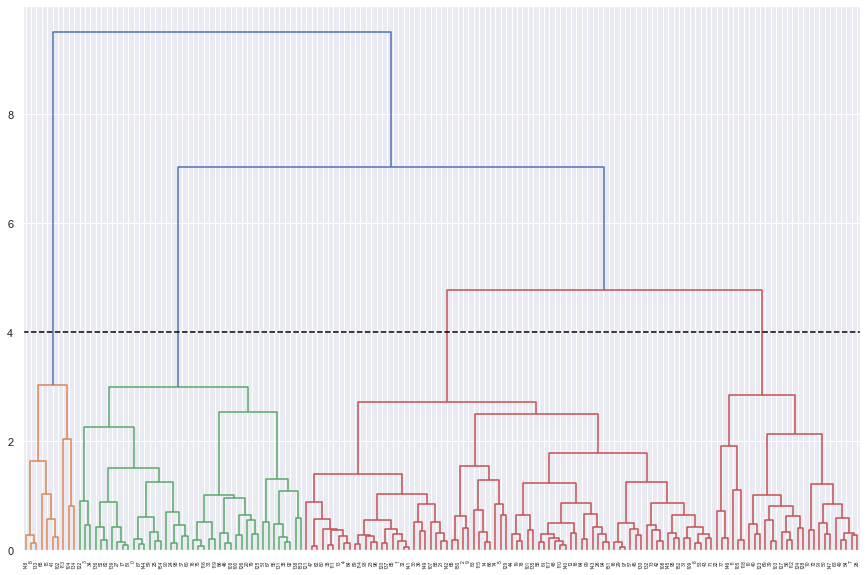

In [68]:
# As We don't get good results in single linkage
# Let's try complete linkage method

plt.figure(figsize=(15,10))
mergings = linkage(data_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.hlines(y=4, xmax=3000, xmin=0, colors="black", linestyles="--")
plt.show()

#### Inference:
Looking at the dedrogram it is observed that cutting it at n = 4 is most optimum.



In [69]:
df_pca_hc = dat_km.copy()
df_pca_hc = dat_km.drop('ClusterID',axis=1)
df_pca_hc.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [73]:
# Let cut the tree at height of approx 3 to get 3 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

In [74]:
df_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Albania,-0.022277,-1.431896,-0.020701,1
2,Algeria,-0.457626,-0.673301,0.961867,1
3,Angola,-2.724520,2.174583,0.606687,0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1


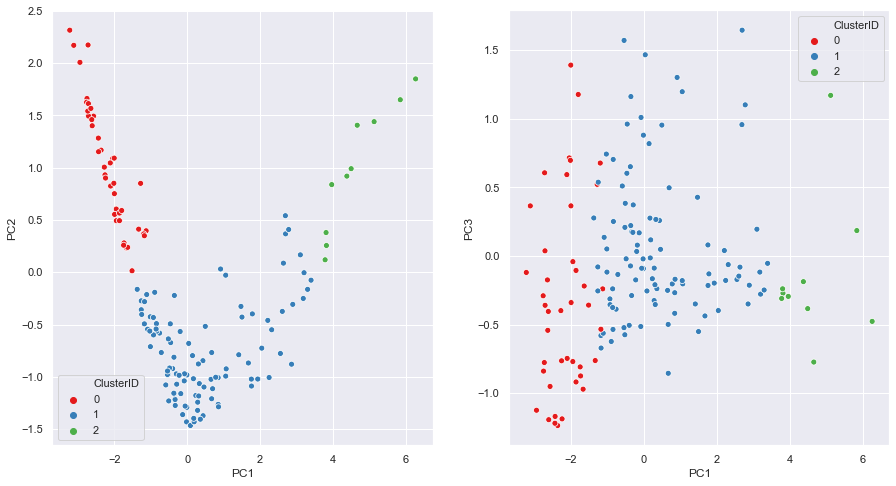

In [75]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',palette="Set1",data=df_hc,ax=axes[1])

 #### Conlusions
 Now we are able to observe almost similar clusters results here from what we got in K-means clustering method.
 
 

In [76]:
# Merging the df with PCA with original df

df_merge_hc = pd.merge(country_new,df_hc,on='country')
df_merge_col_hc = df_merge_hc[['country','child_mort','exports','imports','health','income','inflation',
                            'life_expec','total_fer','gdpp','ClusterID']]

df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,1


In [77]:
df_merge_col_hc['ClusterID'].value_counts()

1    103
0    42 
2    10 
Name: ClusterID, dtype: int64

### Visualising Clusters

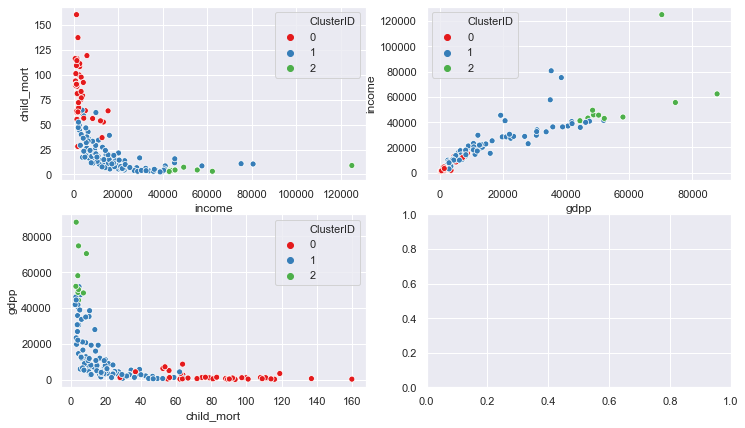

In [78]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(12,7))

sns.scatterplot(x = 'income', y = 'child_mort',hue='ClusterID',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='ClusterID', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='ClusterID', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])

we can see that the death of children is high where as the GDP is very low , Also Life Expectency is lowest among the three

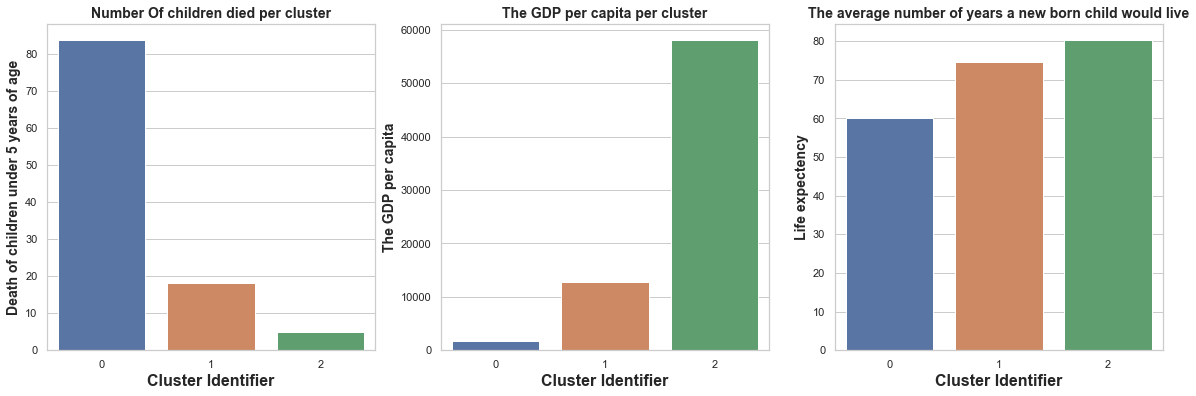

In [79]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(df_merge_col_hc.groupby('ClusterID')['child_mort'].mean().reset_index().ClusterID,
            df_merge_col_hc.groupby('ClusterID')['child_mort'].mean().reset_index().child_mort)
plt.xlabel('Cluster Identifier', fontweight = 'bold', fontsize = 16)
plt.ylabel('Death of children under 5 years of age', fontweight = 'bold', fontsize = 14)
plt.title('Number Of children died per cluster', fontweight = 'bold', fontsize = 14)
plt.subplot(1,3,2)
sns.barplot(df_merge_col_hc.groupby('ClusterID')['gdpp'].mean().reset_index().ClusterID,
            df_merge_col_hc.groupby('ClusterID')['gdpp'].mean().reset_index().gdpp)
plt.xlabel('Cluster Identifier', fontweight = 'bold', fontsize = 16)
plt.ylabel('The GDP per capita', fontweight = 'bold', fontsize = 14)
plt.title('The GDP per capita per cluster', fontweight = 'bold', fontsize = 14)
plt.subplot(1,3,3)
sns.barplot(df_merge_col_hc.groupby('ClusterID')['life_expec'].mean().reset_index().ClusterID,
            df_merge_col_hc.groupby('ClusterID')['life_expec'].mean().reset_index().life_expec)
plt.xlabel('Cluster Identifier', fontweight = 'bold', fontsize = 16)
plt.ylabel('Life expectency', fontweight = 'bold', fontsize = 14 )
plt.title('The average number of years a new born child would live', fontweight = 'bold', fontsize = 14)
plt.show()

#### Conclusion:
From above bar plots we can observe following points: 
- Death rate of children under 5 years of age is maximum at cluster 0.
- Gdp per capita is lowert at cluster 0 and highest at cluster 2.
- The rate of average number of years a new born child would live is lowest at cluster 0.

So the Countries in Cluster-0 Need High Attension from NGO.



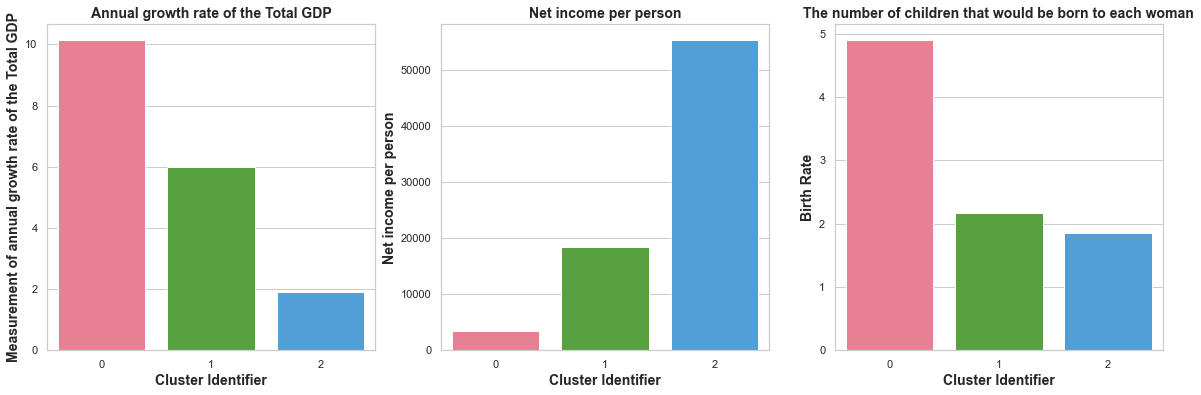

In [80]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(df_merge_col_hc.groupby('ClusterID')['inflation'].mean().reset_index().ClusterID,
            df_merge_col_hc.groupby('ClusterID')['inflation'].mean().reset_index().inflation,palette="husl")
plt.xlabel('Cluster Identifier', fontweight = 'bold', fontsize = 14)
plt.ylabel('Measurement of annual growth rate of the Total GDP', fontweight = 'bold', fontsize = 14)
plt.title('Annual growth rate of the Total GDP', fontweight = 'bold', fontsize = 14)
plt.subplot(1,3,2)
sns.barplot(df_merge_col_hc.groupby('ClusterID')['income'].mean().reset_index().ClusterID,
            df_merge_col_hc.groupby('ClusterID')['income'].mean().reset_index().income,palette="husl")
plt.xlabel('Cluster Identifier', fontweight = 'bold', fontsize = 14)
plt.ylabel('Net income per person', fontweight = 'bold', fontsize = 14)
plt.title('Net income per person', fontweight = 'bold', fontsize = 14)
plt.subplot(1,3,3)
sns.barplot(df_merge_col_hc.groupby('ClusterID')['total_fer'].mean().reset_index().ClusterID,
            df_merge_col_hc.groupby('ClusterID')['total_fer'].mean().reset_index().total_fer,palette="husl")
plt.xlabel('Cluster Identifier', fontweight = 'bold', fontsize = 14)
plt.ylabel('Birth Rate', fontweight = 'bold', fontsize = 14)
plt.title('The number of children that would be born to each woman', fontweight = 'bold', fontsize = 14)
plt.show()


#### Conclusions:
With all the graph plotted it is a clear indication that we should focus on the Cluster 0 as it seems it is a poor country and the birth rate is high, with very less Net-income per person.



#### Top 10 Countries with low per capita GDP.

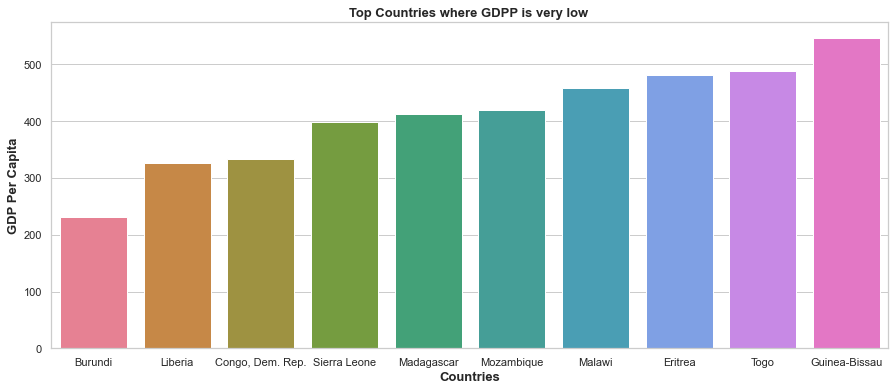

In [81]:
# Sorting 
country_final_gdpp = df_merge_col_hc[df_merge_col_hc.ClusterID==0].sort_values(by='gdpp').head(10)
# plotting
plt.figure(figsize=(15,6))
sns.barplot(x = country_final_gdpp.country,y=country_final_gdpp.gdpp, palette="husl")
plt.xlabel('Countries', fontweight = 'bold', fontsize = 13)
plt.ylabel('GDP Per Capita', fontweight = 'bold', fontsize = 13)
plt.title('Top Countries where GDPP is very low ', fontweight = 'bold', fontsize = 13)
plt.show()

#### Conclusions:
Top 5 Countries with loweset GDP (Burundi,Liberia,Congo,Dem. Rep , Madagascar,Sierra Leone)



#### Analysing the countries on the basis of income

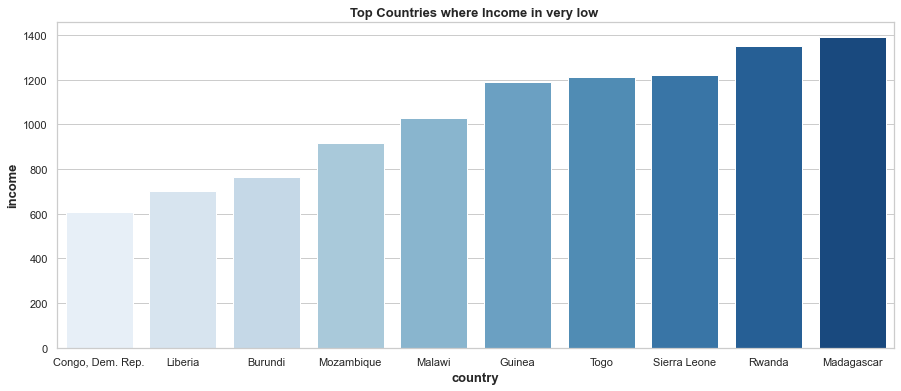

In [82]:
# sorting
backward_countries_income = df_merge_col_hc[df_merge_col_hc.ClusterID==0].sort_values(by='income').head(10)
# plotting
plt.figure(figsize=(15,6))
plt.xlabel('Countries', fontweight = 'bold', fontsize = 13)
plt.ylabel('Income', fontweight = 'bold', fontsize = 13)
sns.barplot(x = backward_countries_income.country,y=backward_countries_income.income,palette='Blues')
plt.title('Top Countries where Income in very low ', fontweight = 'bold', fontsize = 13)
plt.show()

#### Conclusions:
Top 5 Countries with Low income (Congo,Dem.Rep,Liberia,Burundi,Mozambique,Malawi)

In [83]:
# List of countries in Cluster 0
df_merge_col_hc[df_merge_col_hc['ClusterID']==0]


,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,281.976,31.0780,1820,0.885,61.8,5.36,758,0
20,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,0
24,Burkina Faso,116.0,110.4000,170.200,38.7550,1430,6.810,57.9,5.87,575,0
25,Burundi,93.6,20.6052,90.552,26.7960,764,12.300,57.7,6.26,231,0
27,Cameroon,108.0,290.8200,353.700,67.2030,2660,1.910,57.3,5.11,1310,0
33,Comoros,88.2,126.8850,397.573,34.6819,1410,3.870,65.9,4.75,769,0
34,"Congo, Dem. Rep.",116.0,137.2740,165.664,26.4194,609,20.800,57.5,6.54,334,0
35,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.700,60.4,4.95,2740,0


This Should be the cluster that "HELP" need to focus on

### Top 15 countries For Recommendation Based On lower GDP

In [84]:
final_Countries_gdpp = df_merge_col_hc[df_merge_col_hc.ClusterID==0].sort_values(by='gdpp').head(15)
final_Countries_gdpp

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,20.6052,90.552,26.7960,764,12.30,57.7,6.26,231,0
82,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
34,"Congo, Dem. Rep.",116.0,137.2740,165.664,26.4194,609,20.80,57.5,6.54,334,0
122,Sierra Leone,160.0,67.0320,137.655,52.2690,1220,17.20,55.0,5.20,399,0
86,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
98,Mozambique,101.0,131.9850,193.578,21.8299,918,7.64,54.5,5.56,419,0
87,Malawi,90.5,104.6520,160.191,30.2481,1030,12.10,53.1,5.31,459,0
46,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
139,Togo,90.3,196.1760,279.624,37.3320,1210,1.18,58.7,4.87,488,0
60,Guinea-Bissau,114.0,81.5030,192.544,46.4950,1390,2.97,55.6,5.05,547,0


### Top 15 countries For Recommendation Based On lower Income

In [85]:
final_Countries_income = df_merge_col_hc[df_merge_col_hc.ClusterID==0].sort_values(by='income').head(15)
final_Countries_income

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
34,"Congo, Dem. Rep.",116.0,137.2740,165.664,26.4194,609,20.80,57.5,6.54,334,0
82,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
25,Burundi,93.6,20.6052,90.552,26.7960,764,12.30,57.7,6.26,231,0
98,Mozambique,101.0,131.9850,193.578,21.8299,918,7.64,54.5,5.56,419,0
87,Malawi,90.5,104.6520,160.191,30.2481,1030,12.10,53.1,5.31,459,0
59,Guinea,109.0,196.3440,279.936,31.9464,1190,16.10,58.0,5.34,648,0
139,Togo,90.3,196.1760,279.624,37.3320,1210,1.18,58.7,4.87,488,0
122,Sierra Leone,160.0,67.0320,137.655,52.2690,1220,17.20,55.0,5.20,399,0
116,Rwanda,63.6,67.5600,168.900,59.1150,1350,2.61,64.6,4.51,563,0
86,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0


### Top 15 Countries for Recommendation Based On Higher child mortality

In [86]:
final_Countries_Child_mort = df_merge_col_hc[df_merge_col_hc.ClusterID==0].sort_values(by='child_mort')
final_Countries_Child_mort

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
125,Solomon Islands,28.1,635.9700,1047.480,110.2950,1780,6.810,61.7,4.24,1290,0
67,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.600,67.2,4.56,4500,0
20,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.920,57.1,2.88,6350,0
126,South Africa,53.7,2082.0800,1994.720,650.8320,12000,6.350,54.3,2.59,7280,0
46,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.600,61.7,4.61,482,0
100,Namibia,56.0,2480.8200,3150.330,351.8820,8460,3.560,58.6,3.60,5190,0
153,Yemen,56.3,393.0000,450.640,67.8580,4480,23.600,67.5,4.67,1310,0
75,Kenya,62.2,200.1690,324.912,45.9325,2480,2.090,62.8,4.37,967,0
86,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.790,60.8,4.60,413,0
138,Timor-Leste,62.6,79.2000,1000.800,328.3200,1850,26.500,71.1,6.23,3600,0


### Based on Above analysis Final Recommendation Of Countries on Help should concentrate are:

1. Congo, Dem. Rep.
2. Sierra Leone
3. Burundi
4. Guinea-Bissau	
5. Mozambique
6. Guinea
7. Malawi
8. Burkina Faso	
9. Gambia
10. Uganda
11. Togo
12. Madagascar
13. Tanzania                
14. Eritrea
15. Afghanistan
16. Benin
17. Gambia
18. Pakistan
19. Kenya

### Summary of PCA & Clusttering
1. We imported the data for analysis.
2. Perform Normal Check,
    - Checked if there are some missing data or null values.
    - Checked for Duplicate values.
3. We did the outlier analysis and found that there are outliers in some columns; removing the ouliers we lose significant amount of data related to different countries;so we Treated them after PCA and removed Nearly 7% Of data which are not necessary for our analysis.
4. Then we did data scalling before PCA on the dataset and found the principal components as 3 principal components, as these 3 are explaining 93% of the variance in the data we have taken n-componets as 3.
    - Checked on a heat map for collinearity between coulmns and found zero correlation.
5. We now can do the K-means clustering on the data.
    - Computed Silhouette score
    - Then we performed SSD/elbow curve and got optimal no of clusters as.
    - In K means we took K=3 clusters and perfromed the K means. 
    - Elbow curve for optimal number of K = 3
5. Analysis of K-Means and Hierarchical clustering
    - Computed Kmeans
    - Computed two types of Hierarchical clustering
      - Single linkage
      - complete linkage
      - Formed dendrogram
    - Visualized clusters
6. Provided final list of countries